In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

C:\Users\tmachine\AppData\Local\Temp\ipykernel_9896\3324525100.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
Data = load_iris()

In [3]:
df = pd.DataFrame(Data.data,columns=Data.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = Data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [7]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [9]:
df['flowers'] = df.target.apply(lambda x:Data.target_names[x])

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flowers
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

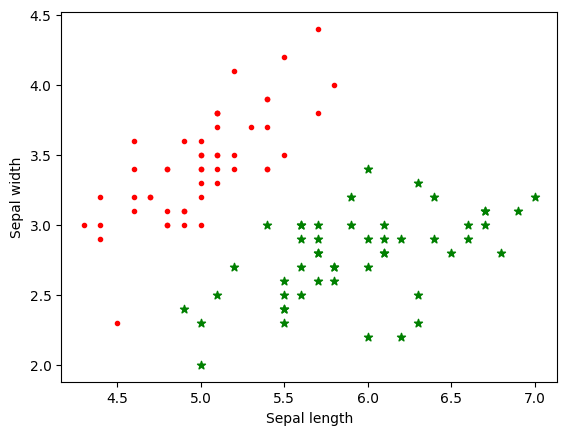

In [12]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],c='red',marker='.')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],c='green',marker='*')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

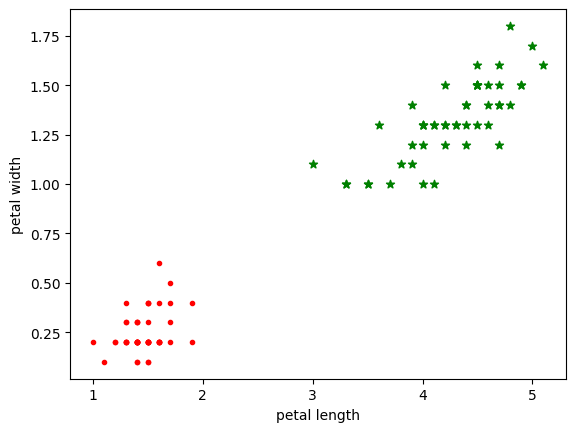

In [13]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],c='red',marker='.')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],c='green',marker='*')
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

In [14]:
X = df.drop(['target','flowers'],axis='columns')
y = df.target

In [15]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [17]:
y_train.dtype

dtype('int32')

In [18]:
print(y_train[:5])

149    2
57     1
1      0
22     0
115    2
Name: target, dtype: int32


In [19]:
print(y_train)

149    2
57     1
1      0
22     0
115    2
      ..
72     1
41     0
81     1
69     1
38     0
Name: target, Length: 120, dtype: int32


In [20]:
print(X_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
149                5.9               3.0                5.1               1.8
57                 4.9               2.4                3.3               1.0
1                  4.9               3.0                1.4               0.2
22                 4.6               3.6                1.0               0.2
115                6.4               3.2                5.3               2.3
..                 ...               ...                ...               ...
72                 6.3               2.5                4.9               1.5
41                 4.5               2.3                1.3               0.3
81                 5.5               2.4                3.7               1.0
69                 5.6               2.5                3.9               1.1
38                 4.4               3.0                1.3               0.2

[120 rows x 4 columns]


In [21]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [22]:
knn.score(X_test,y_test)

0.9300699300699301

In [25]:

y_predict = knn.predict(X_test)


In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming y_test and y_predict contain mixed data types (strings and/or numbers)
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_predict_encoded = le.transform(y_predict)

# Now use the encoded variables for confusion matrix
cm = confusion_matrix(y_test_encoded, y_predict_encoded)

In [29]:
cm

array([[ 4,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 11]], dtype=int64)

<Axes: >

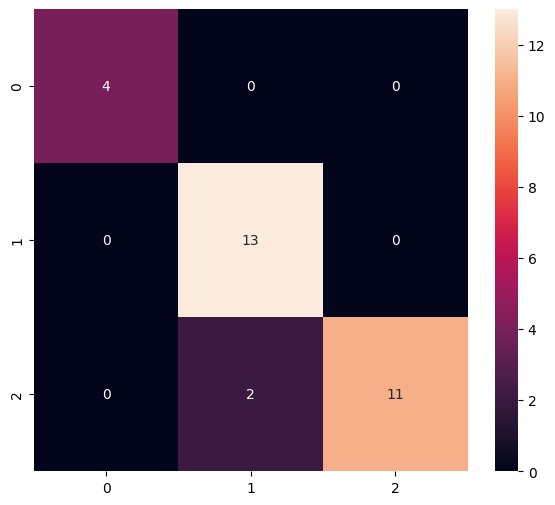

In [30]:
import seaborn as sns
plt.figure(figsize=(7,6))
sns.heatmap(cm,annot=True)


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded,y_predict_encoded))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.87      1.00      0.93        13
           2       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.96      0.95      0.95        30
weighted avg       0.94      0.93      0.93        30

